In [ ]:
!pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 39.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=c36aca8a983fc601e7414541cf789676febf160c102bac519b42c804bb1f6a49
  Stored in directory: /root/.cache/pip/wheels/e2/aa/0f/c224e473b464387170b83ca7c66947b4a7e33e8d903a679748
Successfully built pycountry


In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd

df_co2 = pd.read_csv('gdrive/MyDrive/Data/co2_2.0.csv') #CO2
df_gdp = pd.read_csv('gdrive/MyDrive/Data/gdp_per_capita.csv') #GDP

In [ ]:
df_co2

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,204.631696,208.837879,226.081890,214.785217,207.626699,185.213644,172.158729,210.819017,194.917536,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,0.906060,0.922474,0.930816,0.940570,0.996033,1.047280,1.033908,1.052204,1.079727,...,1.021954,1.048876,1.005338,1.021646,1.031833,1.041145,0.987393,0.971016,0.959978,0.933541
2,Afghanistan,0.046057,0.053589,0.073721,0.074161,0.086174,0.101285,0.107399,0.123409,0.115142,...,0.211306,0.297065,0.407074,0.335351,0.263716,0.234037,0.232176,0.208857,0.203328,0.200151
3,Africa Western and Central,0.090880,0.095283,0.096612,0.112376,0.133258,0.184803,0.193676,0.189305,0.143989,...,0.426770,0.472819,0.497023,0.490867,0.504655,0.507671,0.480743,0.472959,0.476438,0.515544
4,Angola,0.100835,0.082204,0.210533,0.202739,0.213562,0.205891,0.268937,0.172096,0.289702,...,1.205902,1.221515,1.216317,1.204799,1.261542,1.285365,1.260921,1.227703,1.034317,0.887380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",0.011038,0.013599,0.012729,0.014518,0.017550,0.017926,0.017023,0.017380,0.021384,...,1.139166,1.036068,0.869051,0.804146,1.047834,1.034330,0.536269,0.400468,0.361418,0.326682
263,South Africa,5.727223,5.832621,5.887168,5.961337,6.332343,6.616545,6.453858,6.560824,6.593620,...,8.004039,8.300179,7.867124,8.076633,8.137333,8.213158,7.671202,7.564451,7.632729,7.496645
264,Zambia,NaN,NaN,NaN,NaN,0.946606,1.096875,0.951122,1.261960,1.166853,...,0.186907,0.194032,0.218210,0.277909,0.284058,0.311693,0.319282,0.341615,0.414748,0.446065


In [ ]:
nan_count = df_gdp.isna().sum().sum()
print("NaN in GDP dataset: " , nan_count)
nan_count2 = df_co2.isna().sum().sum()
print("NaN in CO2 dataset: " , nan_count2)

NaN in GDP dataset:  3655
NaN in CO2 dataset:  2352


In [ ]:
df_co2=pd.read_csv('gdrive/MyDrive/Data/co2_2.0.csv') #CO2 df
df=pd.melt(df_co2, 
            id_vars='Country Name', 
            value_vars=list(df_co2.columns[1:]),
            var_name='Year', 
            value_name='Co2')


df_co2= df[df['Co2'] != 0]
df_co2 = df_co2.sort_values(by =['Country Name','Year'] )
df_co2= df_co2.fillna(method='ffill')
df_co2

,Country Name,Year,Co2
2,Afghanistan,1960,0.046057
268,Afghanistan,1961,0.053589
534,Afghanistan,1962,0.073721
800,Afghanistan,1963,0.074161
1066,Afghanistan,1964,0.086174
...,...,...,...
14629,Zimbabwe,2014,0.894256
14895,Zimbabwe,2015,0.897598
15161,Zimbabwe,2016,0.783303
15427,Zimbabwe,2017,0.718570


In [ ]:
import pycountry

#Filtering Country with a iso_a3 code 
def findCode (country_name):
  if pycountry.countries.get(alpha_3=country_name) != None:
    return pycountry.countries.get(alpha_3=country_name).alpha_3
  elif pycountry.countries.get(common_name=country_name)!= None:
    return pycountry.countries.get(common_name=country_name).alpha_3
  else:
    return ("not founded")


In [ ]:
df_gdp = pd.read_csv('gdrive/MyDrive/Data/gdp_per_capita.csv') #GDP

#Add column with code
df_gdp['iso_a3'] = df_gdp.apply(lambda row: findCode(row.Code) , axis = 1)

#Removing country data that cannot be represented in the map
df_gdp = df_gdp[df_gdp['iso_a3']!="not founded"]

df_gdp = df_gdp.drop(columns=["Code","iso_a3"])

In [ ]:
#Rotate the df in order to set years as column
df=pd.melt(df_gdp, 
            id_vars='Country Name', 
            value_vars=list(df_gdp.columns[1:]),
            var_name='Year', 
            value_name='Gdp')

df_gdp_new = df[df['Gdp'] != 0] #Drop 0 values

df_gdp_new['Gdp'] = (df_gdp_new['Gdp']/10000) #Unit of measure

df_gdp_new = df_gdp_new.sort_values(by =['Country Name','Year'] ) #Prettyfied dataframe

df_gdp_new= df_gdp_new.fillna(method='ffill') #Fill nan values

df_gdp_new = df_gdp_new.dropna()  #Last Check on NaN values

df_gdp_new.head()



,Country Name,Year,Gdp
1,Afghanistan,1960,0.005977
216,Afghanistan,1961,0.005986
431,Afghanistan,1962,0.005846
646,Afghanistan,1963,0.007871
861,Afghanistan,1964,0.008210


In [ ]:
#Merge co2 and gdp dataset
df_final=pd.merge(df_co2,df_gdp_new,on=['Country Name','Year'],how="inner",indicator=True)
df_final = df_final.reset_index()

df_final = df_final.drop(columns=["index","_merge"])
df_final= df_final.dropna()
df_final


,Country Name,Year,Co2,Gdp
0,Afghanistan,1960,0.046057,0.005977
1,Afghanistan,1961,0.053589,0.005986
2,Afghanistan,1962,0.073721,0.005846
3,Afghanistan,1963,0.074161,0.007871
4,Afghanistan,1964,0.086174,0.008210
...,...,...,...,...
12623,Zimbabwe,2014,0.894256,0.143490
12624,Zimbabwe,2015,0.897598,0.144507
12625,Zimbabwe,2016,0.783303,0.146459
12626,Zimbabwe,2017,0.718570,0.123519


In [ ]:
df_final.to_csv('gdrive/MyDrive/Data/data_gdp_co2.csv')

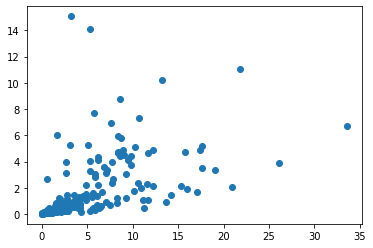

In [ ]:
from matplotlib import pyplot as plt

df_plot = df_final[df_final['Year']=="2010"]
plt.scatter(df_plot['Co2'], df_plot['Gdp'])
plt.show()